In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def compare_tests(n_1, n_2, mu_1, mu_2, std_1, std_2):
    """
    Выводит сравнение результатов тестов
    """
    
    X_1 = np.random.normal(mu_1, std_1, n_1)
    X_2 = np.random.normal(mu_2, std_2, n_2)
    
    return [stats.ttest_ind(X_1, X_2, equal_var=False), stats.ttest_ind(X_1, X_2)]

In [3]:
result = compare_tests(15, 15, 20, 22, 2, 2)
print('t-test: ', result[1])
print('Welch t-test: ', result[0])

t-test:  Ttest_indResult(statistic=-5.439527393177771, pvalue=8.352032322266148e-06)
Welch t-test:  Ttest_indResult(statistic=-5.4395273931777695, pvalue=1.9427547468771504e-05)


In [4]:
result = compare_tests(10, 20, 20, 22, 1, 4)
print('t-test: ', result[1])
print('Welch t-test: ', result[0])

t-test:  Ttest_indResult(statistic=-2.1976939204370622, pvalue=0.03640655887159559)
Welch t-test:  Ttest_indResult(statistic=-2.8973840736774, pvalue=0.007540892560568566)


In [5]:
result = compare_tests(10, 20, 20, 22, 4, 1)
print('t-test: ', result[1])
print('Welch t-test: ', result[0])

t-test:  Ttest_indResult(statistic=-0.9580011164284785, pvalue=0.34626169044104516)
Welch t-test:  Ttest_indResult(statistic=-0.6859572527728167, pvalue=0.5093679014108587)


In [6]:
def p_values(n_1, n_2, mu_1, mu_2, std_1, std_2):
    """
    Выводит списки p-value для различного количества сэмплов при заданных параметрах
    """
    
    
    p_values_welch = []
    p_values_student = []
    total_samples = []
    for x in range(1, 20): #тут просто считает разные размеры выборок, шаг можно поменять 
        tests = compare_tests(n_1*x, n_2*x, mu_1, mu_2, std_1, std_2)
        p_values_welch.append(tests[0][1])
        p_values_student.append(tests[1][1])
        total_samples.append(20*x)
        
    return p_values_welch, p_values_student, total_samples

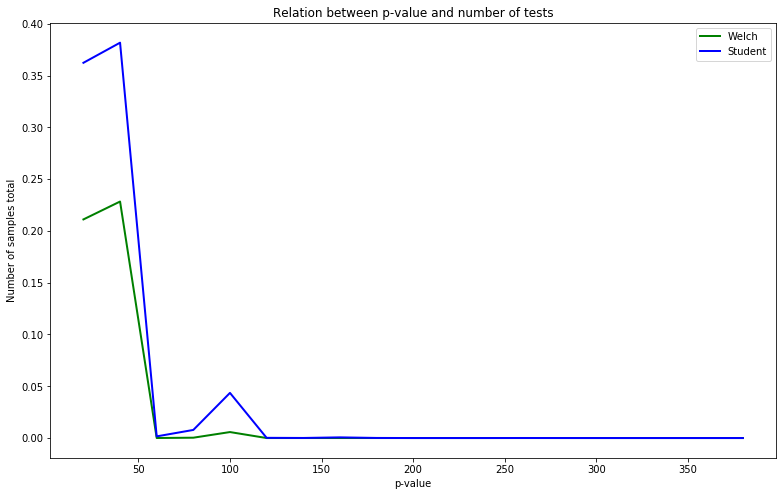

In [7]:
#разные мат ожидания, разные дисперсии, разное количество наблюдений для двух величин
np.random.seed(1337)
p_values_welch, p_values_student,total_samples = p_values(10, 20, 20, 22, 1, 5)
plt.figure(figsize=(13, 8))
plt.plot(total_samples, p_values_welch, linewidth='2', color='green', label='Welch')
plt.plot(total_samples, p_values_student, linewidth='2', color='blue', label='Student')
plt.legend()
plt.xlabel('p-value')
plt.ylabel('Number of samples total')
plt.title('Relation between p-value and number of tests')
plt.show()

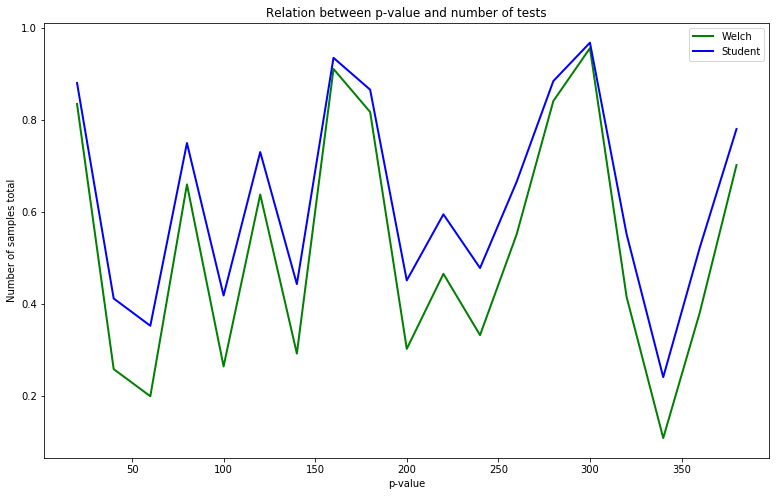

In [11]:
#равные мат ожидания, разные дисперсии, разное количество наблюдений для двух величин
np.random.seed(1337)
p_values_welch, p_values_student,total_samples = p_values(10, 20, 22, 22, 1, 5)
plt.figure(figsize=(13, 8))
plt.plot(total_samples, p_values_welch, linewidth='2', color='green', label='Welch')
plt.plot(total_samples, p_values_student, linewidth='2', color='blue', label='Student')
plt.legend()
plt.xlabel('p-value')
plt.ylabel('Number of samples total')
plt.title('Relation between p-value and number of tests')
plt.savefig('relation.png')

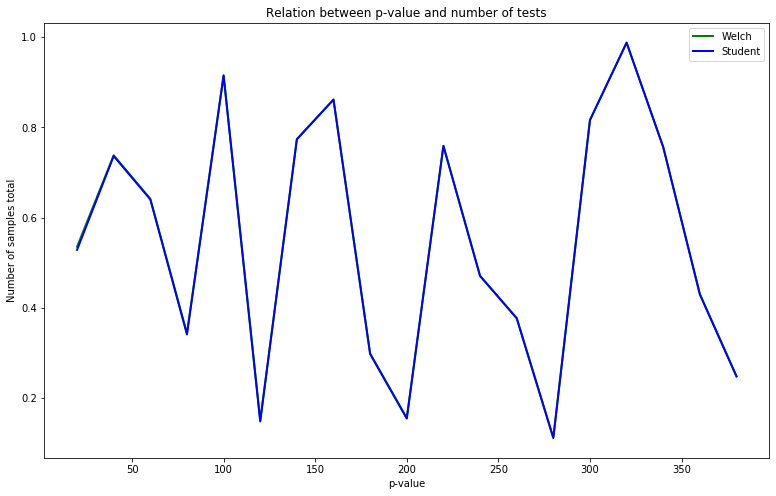

In [9]:
#равные мат ожидания, разные дисперсии, одинаковое количество наблюдений для двух величин
np.random.seed(1337)
p_values_welch, p_values_student,total_samples = p_values(10, 10, 22, 22, 1, 5)
plt.figure(figsize=(13, 8))
plt.plot(total_samples, p_values_welch, linewidth='2', color='green', label='Welch')
plt.plot(total_samples, p_values_student, linewidth='2', color='blue', label='Student')
plt.legend()
plt.xlabel('p-value')
plt.ylabel('Number of samples total')
plt.title('Relation between p-value and number of tests')
plt.show()

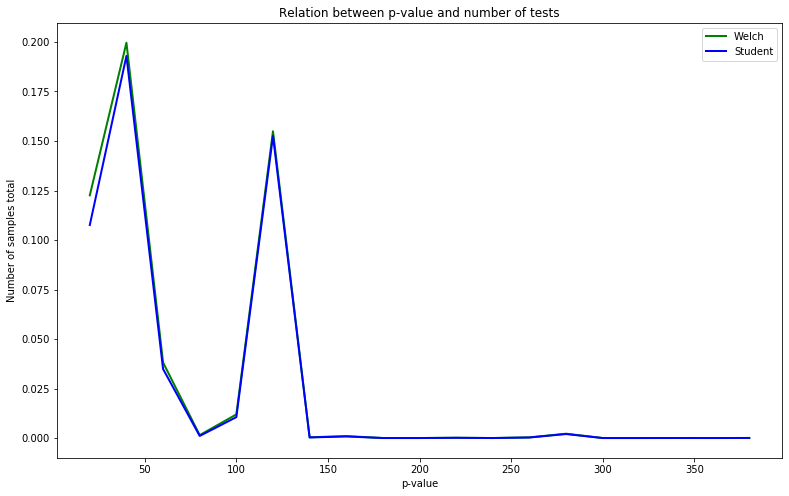

In [10]:
#разные мат ожидания, разные дисперсии, равное количество наблюдений для двух величин
np.random.seed(1337)
p_values_welch, p_values_student,total_samples = p_values(10, 10, 20, 22, 1, 5)
plt.figure(figsize=(13, 8))
plt.plot(total_samples, p_values_welch, linewidth='2', color='green', label='Welch')
plt.plot(total_samples, p_values_student, linewidth='2', color='blue', label='Student')
plt.legend()
plt.xlabel('p-value')
plt.ylabel('Number of samples total')
plt.title('Relation between p-value and number of tests')
plt.show()